In [2]:
import jieba


In [30]:
seg_list = jieba.cut("我来到北京清华大学")  # 默认是精确模式
print('\n默认模式:'+"/ ".join(seg_list))


默认模式:我/ 来到/ 北京/ 清华大学


In [4]:
jieba.enable_paddle()


Paddle enabled successfully......


In [6]:
import wordcloud

In [8]:
w = wordcloud.WordCloud()
w.generate('and that government of the people, by the people, for the people, shall not perish from the earth.')
w.to_file('wordclouds/output1.png')

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


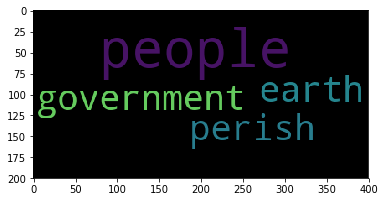

In [22]:
img=Image.open("wordclouds/output1.png")
m=np.asarray(img)
# plt.figure(figsize=(18,24))
plt.imshow(m)

In [29]:
import pkuseg

ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

In [26]:
sentence = '萨哈夫说，伊拉克将同联合国销毁伊拉克大规模杀伤性武器特别委员会继续保持合作。'
seg = pkuseg.pkuseg(postag=False)  # 以默认配置加载模型，不进行词性分析
sentence = seg.cut(sentence)  # 进行分词
print(' '.join(sentence))

NameError: name 'pkuseg' is not defined

In [31]:
import jieba
from _overlapped import NULL


#将句子变为"BOSxxxxxEOS"这种形式
def reform(sentence):
    #如果是以“。”结束的则将“。”删掉
    if sentence.endswith("。"):
        sentence=sentence[:-1]
    #添加起始符BOS和终止符EOS   
    sentence_modify1=sentence.replace("。", "EOSBOS")
    sentence_modify2="BOS"+sentence_modify1+"EOS"
    return sentence_modify2


#分词并统计词频
def segmentation(sentence,lists,dicts=NULL):
    jieba.suggest_freq("BOS", True)
    jieba.suggest_freq("EOS", True)
    sentence = jieba.cut(sentence,HMM=False)
    format_sentence=",".join(sentence)
    #将词按","分割后依次填入数组word_list[]
    lists=format_sentence.split(",")
    #统计词频，如果词在字典word_dir{}中出现过则+1，未出现则=1
    if dicts!=NULL:
        for word in lists:
            if word not in dicts:
                dicts[word]=1
            else:
                dicts[word]+=1               
    return lists


#比较两个数列，二元语法
def compareList(ori_list,test_list):
    #申请空间
    count_list=[0]*(len(test_list))
    #遍历测试的字符串
    for i in range(0,len(test_list)-1):
        #遍历语料字符串，且因为是二元语法，不用比较语料字符串的最后一个字符
        for j in range(0,len(ori_list)-2):                
            #如果测试的第一个词和语料的第一个词相等则比较第二个词
            if test_list[i]==ori_list[j]:
                if test_list[i+1]==ori_list[j+1]:
                    count_list[i]+=1
    return count_list


#计算概率    
def probability(test_list,count_list,ori_dict):
    flag=0
    #概率值为p
    p=1
    for key in test_list: 
        #数据平滑处理：加1法
        p*=(float(count_list[flag]+1)/float(ori_dict[key]+1))
        flag+=1
    return p


if __name__ == "__main__":

    #语料句子
    sentence_ori="研究生物很有意思。他大学时代是研究生物的。生物专业是他的首选目标。他是研究生。"
    ori_list=[]
    ori_dict={}
    sentence_ori_temp=""

    #测试句子
    sentence_test="他是研究生物的"
    sentence_test_temp="" 
    test_list=[]
    count_list=[]
    p=0

    #分词并将结果存入一个list，词频统计结果存入字典
    sentence_ori_temp=reform(sentence_ori)
    ori_list=segmentation(sentence_ori_temp,ori_list,ori_dict)

    sentence_test_temp=reform(sentence_test)
    test_list=segmentation(sentence_test_temp,test_list)

    count_list=compareList(ori_list, test_list)
    p=probability(test_list,count_list,ori_dict)
    print(p)



0.01
